Bubble sort <br>
Źródła: https://iq.opengenus.org/parallel-bubble-sort/ <br>
https://realpython.com/sorting-algorithms-python/#the-bubble-sort-algorithm-in-python <br>
https://www.dcc.fc.up.pt/~ricroc/aulas/1516/cp/apontamentos/slides_sorting.pdf

In [42]:
import random
import multiprocessing
import threading
import itertools
import time
import matplotlib.pyplot as plt

In [10]:
# Generowanie danych
N = 1000
data = [(random.randint(0,N)) for i in range(N)]

In [3]:
lock = threading.Lock()
def bubble_sort(array):
    lock.acquire()
    n = len(array)

    for i in range(n):
        already_sorted = True

        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False

        if already_sorted:
            break
        
    lock.release()

    return array

In [4]:
# Równoległy bubble sort

def bubble_parallel(array): 
        
        threads = multiprocessing.cpu_count()
        
        # dziel na sublisty
        chunks = [[] for _ in range(threads)]

        for j in range(1,len(chunks)):
            for i in array:
                if i <= (int(max(array)/threads)*j):
                        chunks[j-1].append(i)
                        # usun jak juz dodane
                        array = [x for x in array if x != i]
            # to co zotalo do ostatniego chunka
            chunks[-1] = array

        # start threads
        active_threads = []
        for list_item in chunks:
            t = threading.Thread(target=bubble_sort, args=(list_item,))
            t.start()
            active_threads.append(t)
            
        # stop threads
        for thread in active_threads:
            thread.join()

        return list(itertools.chain(*chunks))


Równolegle

In [61]:
N = [100, 1000, 10000, 30000, 50000, 70000, 100000, 120000]
parallel_times = []
parallel_size = []
for i in N:
    data = [(random.randint(0,i)) for j in range(i)]
    start_time = time.time()
    bubble_parallel(data)
    stop_time = time.time() - start_time
    parallel_times.append(stop_time)
    parallel_size.append(i)
    

Sekwencyjnie

In [62]:
N = [100, 1000, 10000, 30000, 50000, 70000, 100000, 120000]
seq_times = []
seq_size = []
for i in N:
    data = [(random.randint(0,i)) for j in range(i)]
    start_time = time.time()
    bubble_sort(data)
    stop_time = time.time() - start_time
    seq_times.append(stop_time)
    seq_size.append(i)

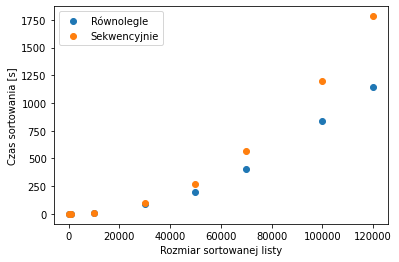

In [63]:
plt.scatter(parallel_size, parallel_times)
plt.scatter(seq_size, seq_times)
plt.xlabel('Rozmiar sortowanej listy')
plt.ylabel('Czas sortowania [s]')
plt.legend(['Równolegle', 'Sekwencyjnie'])
plt.savefig('output1.pdf', bbox_inches='tight')
plt.show()

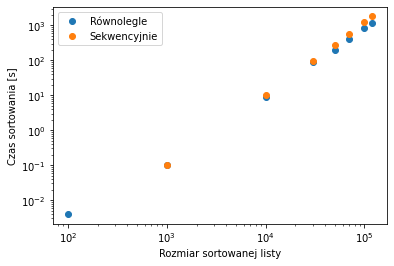

In [64]:
plt.scatter(parallel_size, parallel_times)
plt.scatter(seq_size, seq_times)
plt.xlabel('Rozmiar sortowanej listy')
plt.ylabel('Czas sortowania [s]')
plt.legend(['Równolegle', 'Sekwencyjnie'])
plt.loglog()
plt.savefig('outputlog.pdf', bbox_inches='tight')
plt.show()